# Machine Learning Final Project Report
## By: Emily Hollingshead, Ruchith Chinthoju, Vamsicharan Reddy Petluru

For the most part, songs are classified into genres based on the overall sound and composition that a song is made of. The instruments used, tempo, and musicality are some of the main components that go into this decision. But what if we wanted to get a computer to be able to classify these songs instead? That is the problem we have aimed to solve. Given a dataset with information for 114,000 songs, we used five different machine learning algorithms in an attempt to solve this problem.
Each song has information for the following variables:  track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and track_genre. We want to train our models to predict the track genre based on all of the other variables and see how they relate. 

—--
" This report should serve two purposes: (1) it should provide a description of the ML algorithm implemented to solve the task in sufficient mathematical detail, and (2) it should provide documentation in the form of a tutorial that describes how to use your software. Also, clearly describe your evaluation metric and the formulas used to compute that metric. Based on the results, summarize your work, draw conclusions, and discuss how you think the work can be further improved/extended." 
—----

After we implemented and ran our methods, we found the results to not be very productive. It is unclear as to whether this has to do with our implementation, the dataset being noisy, or if this is a problem that is more complex than expected and relies more on a person's opinion rather than a computer algorithm.


### Import Data

In [10]:
# Import dataset
import pandas as pd
df = pd.read_csv("C:\\Users\\Emily\\OneDrive\\Desktop\\Github\\ML-Semester-Proj\\dataset.csv")

### Decision Tree

In [11]:
# Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.calibration import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

Data Preprocessing

In [51]:
df_dt = df.copy() #make copy so that we can prepare the data correctly
df_dt = df_dt.dropna(axis = 0) #remove na values
#unique variable, will not be useful to us
df_dt = df_dt.drop('track_id', axis=1)
#album name and track name are not going to be useful either
df_dt = df_dt.drop(['album_name','track_name'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

y_pred = tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.9990350877192983
Confusion Matrix:
[[107   0   0 ...   0   0   0]
 [  0 105   0 ...   0   0   0]
 [  0   0 109 ...   0   0   0]
 ...
 [  0   0   0 ... 100   0   0]
 [  0   0   0 ...   0 104   0]
 [  0   0   0 ...   0   0 104]]
Classification Report:
                   precision    recall  f1-score   support

         acoustic       1.00      1.00      1.00       107
         afrobeat       1.00      1.00      1.00       105
         alt-rock       1.00      1.00      1.00       109
      alternative       1.00      1.00      1.00       108
          ambient       1.00      1.00      1.00       112
            anime       1.00      1.00      1.00        96
      black-metal       1.00      1.00      1.00        96
        bluegrass       1.00      1.00      1.00        98
            blues       1.00      1.00      1.00       102
           brazil       1.00      1.00      1.00        97
        breakbeat       1.00      1.00      1.00       113
          british       1.00 

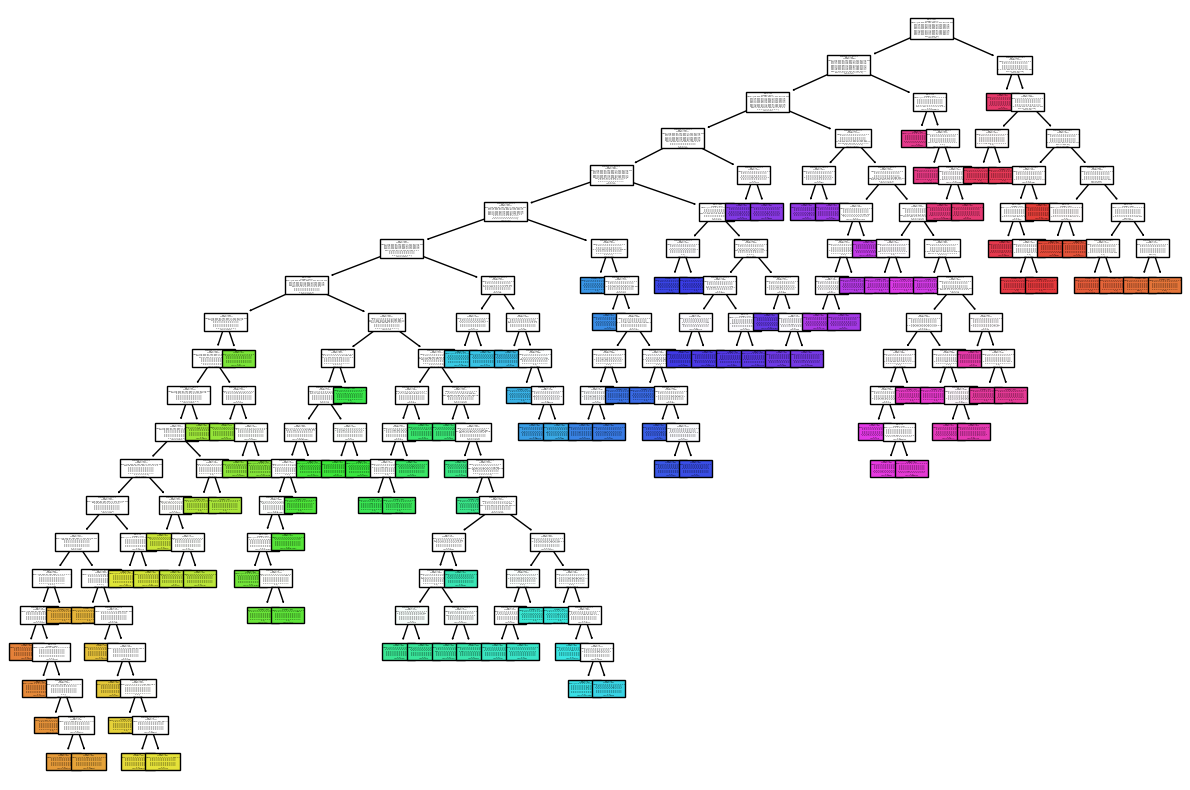

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = list(X.columns)

plt.figure(figsize=(15, 10))
plot_tree(tree_classifier, filled=True, feature_names=feature_names, class_names=list(map(str, tree_classifier.classes_)))
plt.show()

### Naive Bayes

In [46]:
df_nb = df.copy()
df_nb = df_nb.dropna(axis = 0) #remove na values

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.calibration import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df_nb = df_nb.drop('track_id', axis=1)
df_nb = df_nb.drop(['album_name','track_name'], axis=1)
label_encoder = LabelEncoder()
df_nb['artist_encoded'] = df_nb['artists'].str.split(',').str[0].str.strip()
df_nb['artist_encoded'] = label_encoder.fit_transform(df_nb['artist_encoded'])
X= df_nb.drop(['track_genre', 'artists'], axis=1)
y = df_nb['track_genre']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.1, random_state = 0)
classifier = GaussianNB(var_smoothing=1e-6)
classifier.fit(X_Train, Y_Train)
y_pred = classifier.predict(X_Test)
accuracy = accuracy_score(Y_Test, y_pred)
confusion_mat = confusion_matrix(Y_Test, y_pred)
classification_rep = classification_report(Y_Test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.9673684210526315
Confusion Matrix:
[[106   1   0 ...   0   0   0]
 [  5  97   3 ...   0   0   0]
 [  0   0 109 ...   0   0   0]
 ...
 [  0   0   0 ...  98   2   0]
 [  0   0   0 ...   0 102   2]
 [  0   0   0 ...   0   5  98]]
Classification Report:
                   precision    recall  f1-score   support

         acoustic       0.95      0.99      0.97       107
         afrobeat       0.99      0.92      0.96       105
         alt-rock       0.96      1.00      0.98       109
      alternative       0.97      0.98      0.98       108
          ambient       0.99      0.95      0.97       112
            anime       0.95      0.99      0.97        96
      black-metal       0.97      0.96      0.96        96
        bluegrass       0.96      0.98      0.97        98
            blues       0.98      0.96      0.97       102
           brazil       0.90      0.97      0.93        97
        breakbeat       0.98      0.89      0.94       113
          british       0.97 

### Logistic Regression

In [30]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression

df_lr = df.copy()
df_lr = df_lr.dropna(axis=0)
df_lr = df_lr.drop(['track_id', 'album_name', 'track_name'], axis=1)

# Encode the 'artists' column
label_encoder = LabelEncoder()
df_lr['artist_encoded'] = df_lr['artists'].str.split(',').str[0].str.strip()
df_lr['artist_encoded'] = label_encoder.fit_transform(df_lr['artist_encoded'])

# Drop irrelevant columns
X_lr = df_lr.drop(['track_genre', 'artists'], axis=1)
y_lr = df_lr['track_genre']

# Split the data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.1, random_state=0)

# Standardize the features if needed (Logistic Regression is not sensitive to feature scaling, but it might help in some cases)
scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train_lr)
X_test_lr = scaler.transform(X_test_lr)

# Create a Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter= 1000, random_state=0)

# Train the classifier
lr_classifier.fit(X_train_lr, y_train_lr)

# Make predictions on the test set
y_pred_lr = lr_classifier.predict(X_test_lr)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)
confusion_mat_lr = confusion_matrix(y_test_lr, y_pred_lr)
classification_rep_lr = classification_report(y_test_lr, y_pred_lr)

# Print the results
print(f"Accuracy (Logistic Regression): {accuracy_lr}")
print(f"Confusion Matrix (Logistic Regression):\n{confusion_mat_lr}")
print(f"Classification Report (Logistic Regression):\n{classification_rep_lr}")


Accuracy (Logistic Regression): 0.506578947368421
Confusion Matrix (Logistic Regression):
[[85  8  9 ...  0  0  0]
 [ 3 90  4 ...  0  0  0]
 [16 10 46 ...  0  0  0]
 ...
 [ 0  0  0 ... 50 11 12]
 [ 0  0  0 ...  3 79  5]
 [ 0  0  0 ...  1 11 89]]
Classification Report (Logistic Regression):
                   precision    recall  f1-score   support

         acoustic       0.66      0.79      0.72       107
         afrobeat       0.71      0.86      0.78       105
         alt-rock       0.41      0.42      0.42       109
      alternative       0.46      0.36      0.41       108
          ambient       0.74      0.74      0.74       112
            anime       0.41      0.36      0.39        96
      black-metal       0.67      0.88      0.76        96
        bluegrass       0.53      0.60      0.56        98
            blues       0.40      0.31      0.35       102
           brazil       0.45      0.41      0.43        97
        breakbeat       0.68      0.62      0.65       113


### Support Vector Machine

In [48]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

df_svm = df.copy()
df_svm = df_svm.dropna(axis=0)
df_svm = df_svm.drop(['track_id', 'album_name', 'track_name'], axis=1)

# Encode the 'artists' column
label_encoder = LabelEncoder()
df_svm['artist_encoded'] = df_svm['artists'].str.split(',').str[0].str.strip()
df_svm['artist_encoded'] = label_encoder.fit_transform(df_svm['artist_encoded'])

# Drop irrelevant columns
X_svm = df_svm.drop(['track_genre', 'artists'], axis=1)
y_svm = df_svm['track_genre']

# Split the data into training and testing sets
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.1, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_svm = scaler.fit_transform(X_train_svm)
X_test_svm = scaler.transform(X_test_svm)

# Create an SVM classifier
svm_classifier = SVC(kernel= 'rbf', random_state=0)

# Train the classifier
svm_classifier.fit(X_train_svm, y_train_svm)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_svm)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
confusion_mat_svm = confusion_matrix(y_test_svm, y_pred_svm)
classification_rep_svm = classification_report(y_test_svm, y_pred_svm)

# Print the results
print(f"Accuracy (SVM): {accuracy_svm}")
print(f"Confusion Matrix (SVM):\n{confusion_mat_svm}")
print(f"Classification Report (SVM):\n{classification_rep_svm}")


Accuracy (SVM): 0.616140350877193
Confusion Matrix (SVM):
[[80  4  6 ...  0  0  0]
 [ 2 90  0 ...  0  0  0]
 [ 8  1 47 ...  0  0  0]
 ...
 [ 0  0  0 ... 45 11  4]
 [ 0  0  0 ...  2 69  4]
 [ 0  0  0 ...  0  6 81]]
Classification Report (SVM):
                   precision    recall  f1-score   support

         acoustic       0.69      0.75      0.72       107
         afrobeat       0.86      0.86      0.86       105
         alt-rock       0.44      0.43      0.43       109
      alternative       0.55      0.52      0.53       108
          ambient       0.65      0.71      0.68       112
            anime       0.53      0.52      0.52        96
      black-metal       0.80      0.92      0.85        96
        bluegrass       0.71      0.72      0.72        98
            blues       0.47      0.43      0.45       102
           brazil       0.54      0.58      0.56        97
        breakbeat       0.70      0.63      0.66       113
          british       0.54      0.30      0.38

### Multi-Layer Perceptron

In [49]:
from sklearn.neural_network import MLPClassifier

df_mlp = df.copy()
df_mlp = df_mlp.dropna(axis=0)
df_mlp = df_mlp.drop(['track_id', 'album_name', 'track_name'], axis=1)

# Encode the 'artists' column
label_encoder = LabelEncoder()
df_mlp['artist_encoded'] = df_mlp['artists'].str.split(',').str[0].str.strip()
df_mlp['artist_encoded'] = label_encoder.fit_transform(df_mlp['artist_encoded'])

# Drop irrelevant columns
X_mlp = df_mlp.drop(['track_genre', 'artists'], axis=1)
y_mlp = df_mlp['track_genre']

# Split the data into training and testing sets
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X_mlp, y_mlp, test_size=0.1, random_state=0)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_mlp = scaler.fit_transform(X_train_mlp)
X_test_mlp = scaler.transform(X_test_mlp)

# Create an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(30,), max_iter=1000, random_state=0)

# Train the classifier
mlp_classifier.fit(X_train_mlp, y_train_mlp)

# Make predictions on the test set
y_pred_mlp = mlp_classifier.predict(X_test_mlp)

# Evaluate the MLP model
accuracy_mlp = accuracy_score(y_test_mlp, y_pred_mlp)
confusion_mat_mlp = confusion_matrix(y_test_mlp, y_pred_mlp)
classification_rep_mlp = classification_report(y_test_mlp, y_pred_mlp)

# Print the results
print(f"Accuracy (MLP): {accuracy_mlp}")
print(f"Confusion Matrix (MLP):\n{confusion_mat_mlp}")
print(f"Classification Report (MLP):\n{classification_rep_mlp}")


Accuracy (MLP): 0.9341228070175439
Confusion Matrix (MLP):
[[106   1   0 ...   0   0   0]
 [  0 104   1 ...   0   0   0]
 [  0   1 107 ...   0   0   0]
 ...
 [  0   0   0 ...  91   4   0]
 [  0   0   0 ...   3 100   1]
 [  0   0   0 ...   0   0 104]]
Classification Report (MLP):
                   precision    recall  f1-score   support

         acoustic       1.00      0.99      1.00       107
         afrobeat       0.98      0.99      0.99       105
         alt-rock       0.98      0.98      0.98       109
      alternative       0.99      0.97      0.98       108
          ambient       0.98      0.96      0.97       112
            anime       0.94      0.98      0.96        96
      black-metal       0.98      0.97      0.97        96
        bluegrass       0.99      0.99      0.99        98
            blues       0.94      1.00      0.97       102
           brazil       0.98      0.94      0.96        97
        breakbeat       0.97      0.96      0.97       113
          b

c:\Users\Emily\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
